In [74]:
from google.colab import files
files.upload()

Saving glass.csv to glass (4).csv
Saving real_estate.csv to real_estate (4).csv


{'glass.csv': b'RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type\r\n1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1\r\n1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1\r\n1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1\r\n1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1\r\n1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1\r\n1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1\r\n1.51743,13.3,3.6,1.14,73.09,0.58,8.17,0,0,1\r\n1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0,1\r\n1.51918,14.04,3.58,1.37,72.08,0.56,8.3,0,0,1\r\n1.51755,13,3.6,1.36,72.99,0.57,8.4,0,0.11,1\r\n1.51571,12.72,3.46,1.56,73.2,0.67,8.09,0,0.24,1\r\n1.51763,12.8,3.66,1.27,73.01,0.6,8.56,0,0,1\r\n1.51589,12.88,3.43,1.4,73.28,0.69,8.05,0,0.24,1\r\n1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0,0.17,1\r\n1.51763,12.61,3.59,1.31,73.29,0.58,8.5,0,0,1\r\n1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0,0,1\r\n1.51784,12.68,3.67,1.16,73.11,0.61,8.7,0,0,1\r\n1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0,0,1\r\n1.51911,13.9,3.73,1.18,72.12,0.06,8.89,0,0,1\r\n1.51735,13.02,3.54,1.

In [75]:
import numpy as np
import pandas as pd
from  sklearn.datasets import make_regression
from  sklearn.metrics import mean_squared_error
from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from  sklearn.datasets import load_breast_cancer
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)
from  sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics import accuracy_score
from  sklearn.tree import DecisionTreeClassifier
from  sklearn import tree
from  sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, r2_score

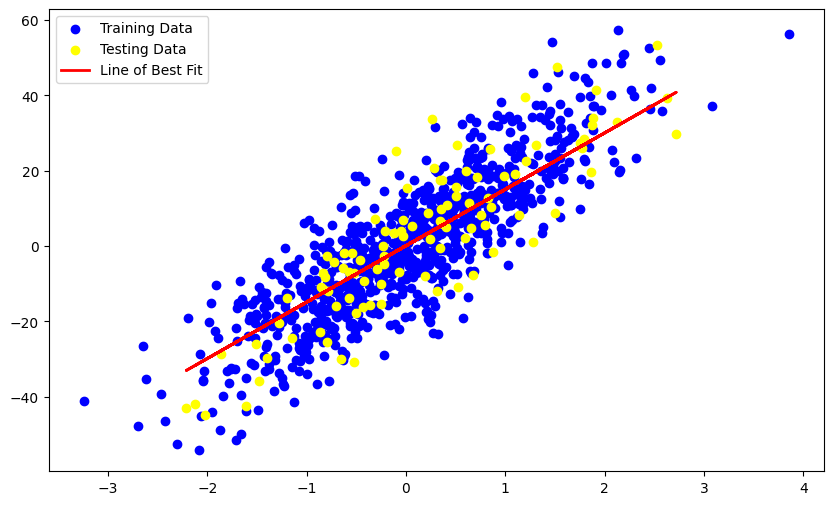

In [69]:
# pblm 1
class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train = y_train.reshape(-1, 1)

        # Initialize parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = np.zeros((1, 1))

        # Gradient descent with regularization
        for i in range(self.epochs):
            y_pred = np.dot(X_train, self.weights) + self.bias
            delta = y_pred - y_train

            if self.penalty is None:
                dw = np.dot(X_train.T, delta) / n_samples
                db = np.sum(delta) / n_samples
            elif self.penalty == "L1":
                dw = (np.dot(X_train.T, delta) + self.alpha * np.sign(self.weights)) / n_samples
                db = np.sum(delta) / n_samples
            elif self.penalty == "L2":
                dw = (np.dot(X_train.T, delta) + 2 * self.alpha * self.weights) / n_samples
                db = np.sum(delta) / n_samples

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X_test):
        y_predicted = np.dot(X_test, self.weights) + self.bias
        return y_predicted


X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

lr_model = LinearRegression(learning_rate=0.001, epochs=2500, penalty="L2", alpha=0.1)
lr_model.fit(X_train, y_train)
y_predicted = lr_model.predict(X_test)

y_pred = lr_model.predict(X_train)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='yellow', label='Testing Data')
plt.plot(X_test, y_predicted, color='red', linewidth=2, label='Line of Best Fit')
plt.legend()
plt.show()


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
Linear Regression Model:
MSE: 7.271817799308493e-05
R2 Score: 0.7193926410146012

Lasso Regression Model:
MSE: 0.00026422814887437635
R2 Score: -0.019612496785744726

Ridge Regression Model:
MSE: 7.701099640749123e-05
R2 Score: 0.7028273684635619


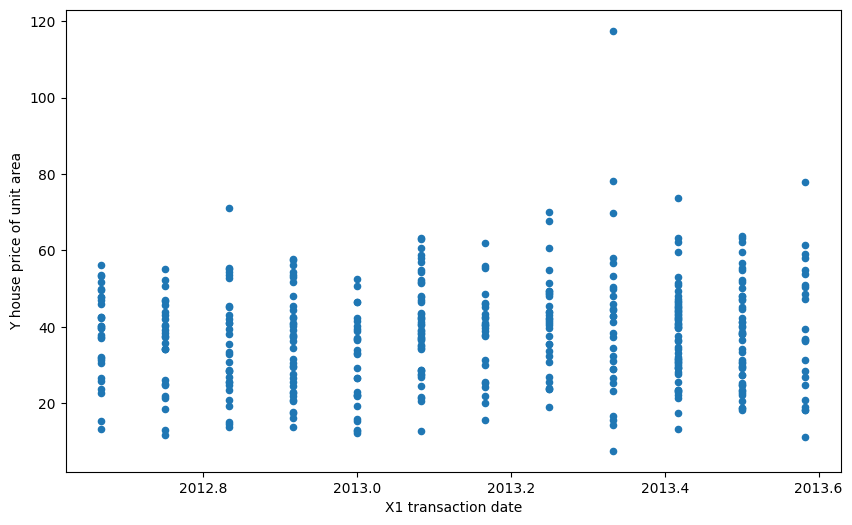

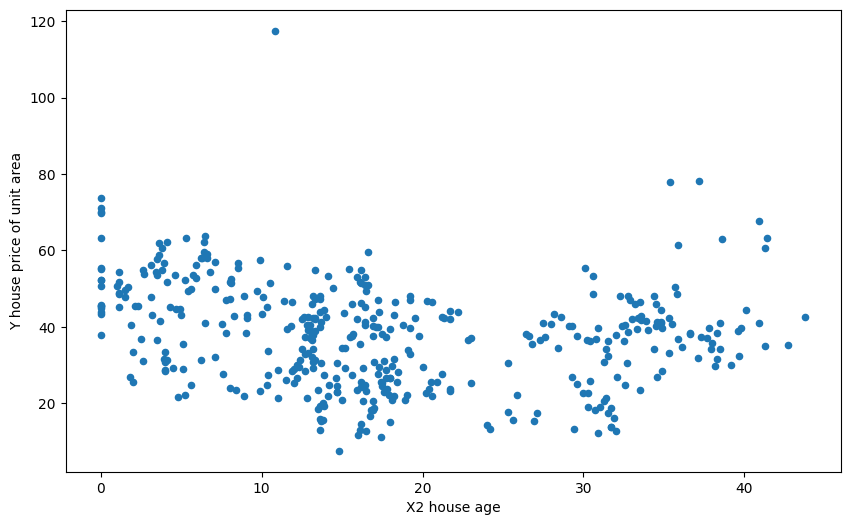

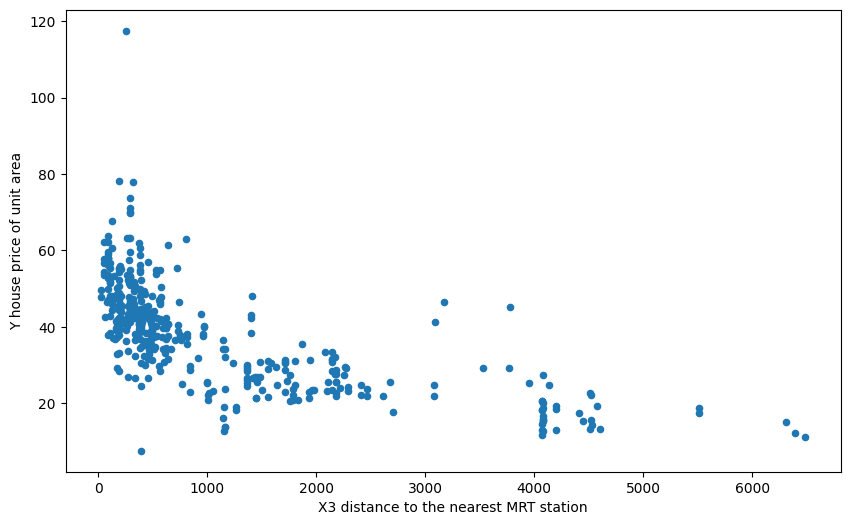

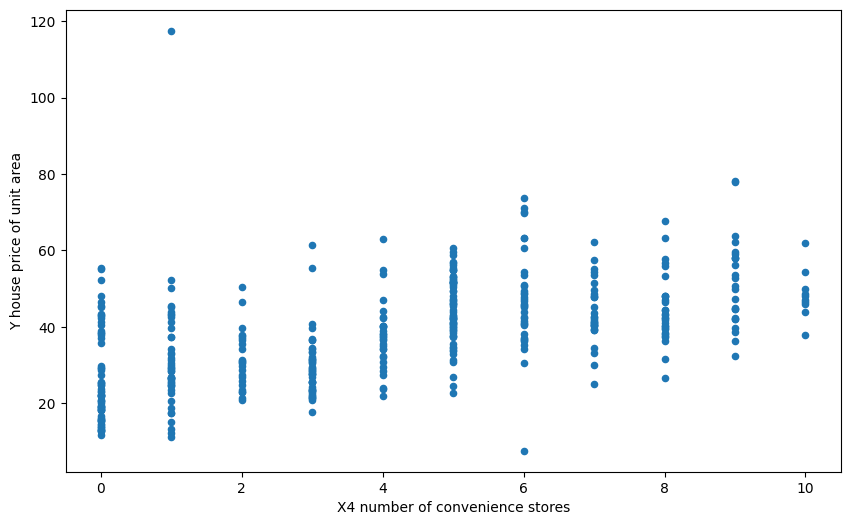

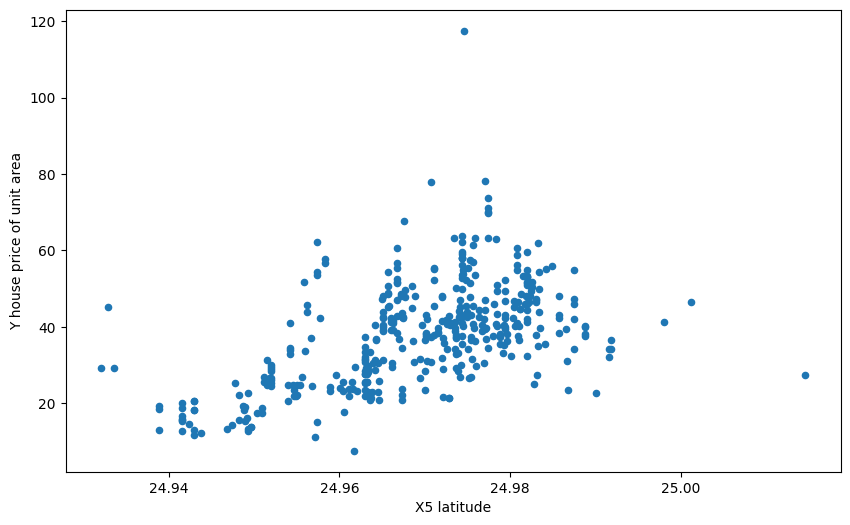

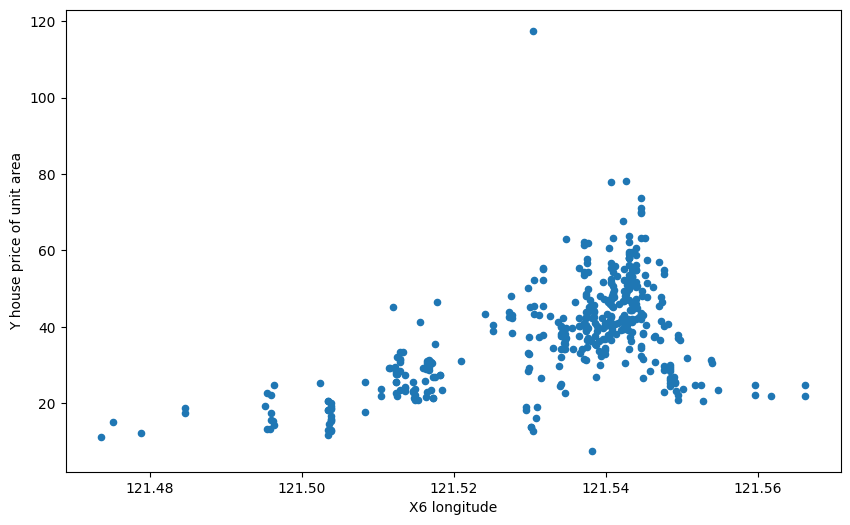

In [76]:
#pblm 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Read the dataset using pandas
df = pd.read_csv('real_estate.csv')

# Check for null values
print(df.isnull().sum())

# Plot against the last column (house price of unit area)
for column in df.columns[1:-1]:
    df.plot(x=column, y='Y house price of unit area', kind='scatter')

# Remove unwanted columns (first and last)
df = df.iloc[:, 1:-1]

# Split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.25, random_state=42)

# Normalize the X_train and X_test using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict the testing data using the LinearRegression model
lr_y_pred = lr_model.predict(X_test_scaled)

# Evaluate the LinearRegression model using MSE and R2
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print("Linear Regression Model:")
print("MSE:", lr_mse)
print("R2 Score:", lr_r2)

# Create and fit the LassoRegression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predicting using LassoRegression model
lasso_y_pred = lasso_model.predict(X_test_scaled)

# Evaluating LassoRegression model using MSE and R2
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print("\nLasso Regression Model:")
print("MSE:", lasso_mse)
print("R2 Score:", lasso_r2)

# Create and fit the RidgeRegression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predicting using the RidgeRegression model
ridge_y_pred = ridge_model.predict(X_test_scaled)

# Evaluating the RidgeRegression model using MSE and R2
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("\nRidge Regression Model:")
print("MSE:", ridge_mse)
print("R2 Score:", ridge_r2)


In [77]:


#pblm 3
#breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the X data:
scaler = MinMaxScaler()  # or StandardScaler()
X_normalized = scaler.fit_transform(X)

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Fit logisticRegression model on training
model = LogisticRegression(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# Make predictions about  test data
y_pred = model.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Custom Model):", accuracy)

# Print classification report
print("Classification Report (Custom Model):")
print(classification_report(y_test, y_pred, zero_division=1))

# Print confusion matrix
print("Confusion Matrix (Custom Model):")
print(confusion_matrix(y_test, y_pred))

# Compare with LogisticRegn model
from sklearn.linear_model import LogisticRegression as sklearnLogisticRegression

# Fit LogisticRegn model
sklearn_model = sklearnLogisticRegression()
sklearn_model.fit(X_train, y_train)

# Making prediction using sklearn's model
sklearn_y_pred = sklearn_model.predict(X_test)

# Print accuracy score
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
print("Accuracy (sklearn Model):", sklearn_accuracy)

# Print classification report
print("Classification Report (sklearn Model):")
print(classification_report(y_test, sklearn_y_pred, zero_division=1))

# Print confusion matrix
print("Confusion Matrix (sklearn Model):")
print(confusion_matrix(y_test, sklearn_y_pred))


Accuracy (Custom Model): 0.37719298245614036
Classification Report (Custom Model):
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       1.00      0.00      0.00        71

    accuracy                           0.38       114
   macro avg       0.69      0.50      0.27       114
weighted avg       0.77      0.38      0.21       114

Confusion Matrix (Custom Model):
[[43  0]
 [71  0]]
Accuracy (sklearn Model): 0.9824561403508771
Classification Report (sklearn Model):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix (sklearn Model):
[[41  2]
 [ 0 71]]


KNN accuracy: 1.0
Scikit-learn KNN accuracy: 1.0
Decision Tree accuracy (max_depth=5): 1.0
Decision Tree accuracy (max_depth=6): 1.0
Decision Tree accuracy (max_depth=7): 1.0
Decision Tree accuracy (max_depth=8): 1.0
Decision Tree accuracy (max_depth=9): 1.0
Decision Tree accuracy (max_depth=10): 1.0


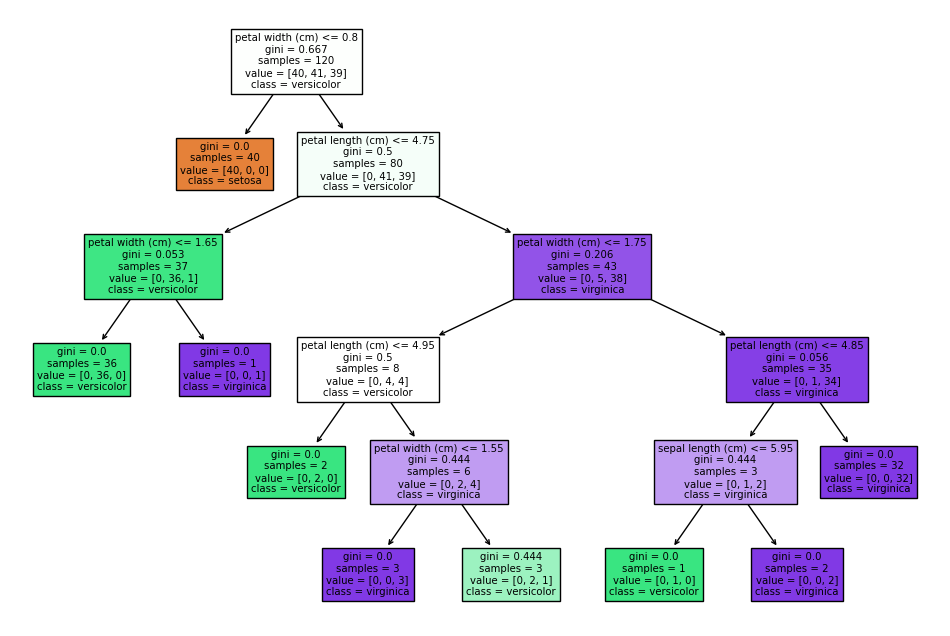

In [78]:
#pblm 4
dataset = load_iris()
X = dataset.data
Y = dataset.target
feature_names = dataset.feature_names

# Split the data into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Building the KNN model
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

# KNN model on the training data
knn = KNN(k=3)
knn.fit(np.array(X_train), np.array(Y_train))

Y_pred = knn.predict(np.array(X_test))
accuracy = accuracy_score(Y_test, Y_pred)
print("KNN accuracy:", accuracy)

sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train, Y_train)
Y_pred_sklearn = sklearn_knn.predict(X_test)

accuracy_sklearn = accuracy_score(Y_test, Y_pred_sklearn)
print("Scikit-learn KNN accuracy:", accuracy_sklearn)

max_depths = range(5, 11)
accuracies_dt = []

for max_depth in max_depths:
    # Build the Decision Tree model
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
    accuracies_dt.append(accuracy_dt)
    print(f"Decision Tree accuracy (max_depth={max_depth}):", accuracy_dt)

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=feature_names, class_names=dataset.target_names, filled=True)
plt.show()
